In [1]:
import os
import fnmatch
from random import shuffle
from math import floor
import shutil

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path="../data/idcard3/"
#dataset="idcard3"

## declarations des fonctions

In [4]:
def randomize_files(file_list):
    shuffle(file_list)

In [5]:
def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    data_files = list(filter(lambda file: (file.endswith('.jpeg') 
                                           or file.endswith('.jpg') 
                                           or file.endswith('.png'))
                             , all_files))
    randomize_files(data_files)
    return data_files

In [6]:
def get_training_and_testing_sets(file_list,split = 0.7):
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    return training

In [7]:
def make_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [8]:
def move_dir(source,directory,file_list):
    for x in file_list:
        os.rename("./"+source+"/"+x,directory+"/"+x)

In [9]:
def rm_dir(directory):
    if os.path.isdir(directory):
        shutil.rmtree(directory, ignore_errors=True)
        print(f'repertoire {directory} effacé')
    else:
        print(f'repertoire {directory} non trouvé')

In [10]:
def do_job(source_dir, path):
    print(f'processing {source_dir}')
    
    valid_dir = path+"dataset/valid/" + source_dir
    train_dir = path+"dataset/train/" + source_dir

    make_dir(train_dir)
    make_dir(valid_dir)

    train_list = get_training_and_testing_sets(get_file_list_from_dir(path+source_dir))
    print(f"{len(train_list)} items in train_list")
    move_dir(path+source_dir,train_dir,train_list)

    valid_list = get_file_list_from_dir(path+source_dir)
    print(f"{len(valid_list)} items in valid_list")
    move_dir(path+source_dir,valid_dir,valid_list)
    
    rm_dir(path+source_dir)
    print('---')

In [11]:
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        #subindent = ' ' * 4 * (level + 1)
        #for f in files:
        #    print('{}{}'.format(subindent, f))

## Equilibrer nos jeux de données
la classe anything comporte trop d'images par rapport aux 2 autres classes.
rejet aléatoire de 60% des images de la classe anything, on en conserve 40%

In [12]:
anything_dir = path+"anything"
filtered_dir = path+"filtered_anything"


#extract files to get balanced dataset
anything_list = get_training_and_testing_sets(get_file_list_from_dir(anything_dir),0.6)
print(f'{len(anything_list)} fichiers rejetés')
print('---')

make_dir(filtered_dir)
move_dir(anything_dir,filtered_dir,anything_list)

for s in os.listdir(path):
    print(f'{s} contient {len(os.listdir(path+"/"+s))} images')
print('---')

rm_dir(filtered_dir)

1251 fichiers rejetés
---
anything contient 834 images
identity contient 829 images
inside contient 395 images
filtered_anything contient 1251 images
---
repertoire ../data/idcard3/filtered_anything effacé


## Organiser nos données pour les adapter à notre modèle auto-apprenant

In [13]:
listdir = [f for f in os.listdir(path)]
print(listdir)

['anything', 'identity', 'inside']


In [14]:
for y in listdir:
    do_job(y,path)

processing anything
583 items in train_list
251 items in valid_list
repertoire ../data/idcard3/anything effacé
processing identity
580 items in train_list
249 items in valid_list
repertoire ../data/idcard3/identity effacé
processing inside
276 items in train_list
119 items in valid_list
repertoire ../data/idcard3/inside effacé


## analyse du dataset

In [25]:
d=path+"dataset/train"
print(d)
for s in os.listdir(d):
    print(f'{s} contient {len(os.listdir(d+"/"+s))} images')

../data/idcard3/dataset/train
anything contient 583 images
identity contient 580 images
inside contient 276 images


In [26]:
d=path+"dataset/valid"
print(d)
for s in os.listdir(d):
    print(f'{s} contient {len(os.listdir(d+"/"+s))} images')

../data/idcard3/dataset/valid
anything contient 251 images
identity contient 249 images
inside contient 119 images


## visualisation d'échantillons

#### anything = aucune piece d'identité valide dans l'image

../data/idcard3/dataset/valid/anything


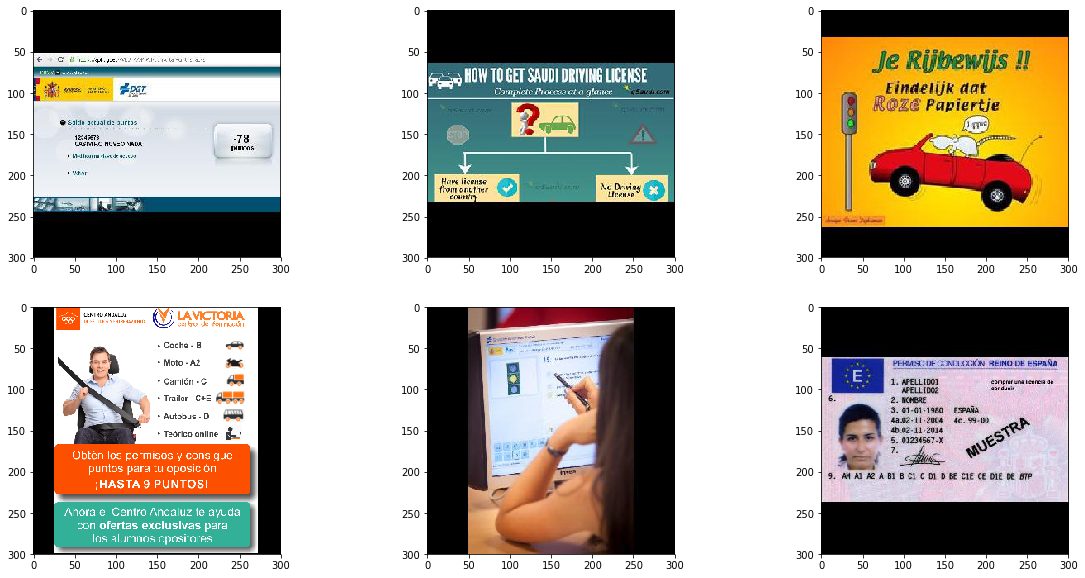

In [39]:
path_det=d+"/"+os.listdir(d)[0]
print(path_det)
fig = plt.figure(figsize=(20,10))
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    img = plt.imread(path_det+"/"+os.listdir(path_det)[i])
    plt.imshow(img)

#### identity = piece d'identité détourée

../data/idcard3/dataset/valid/identity


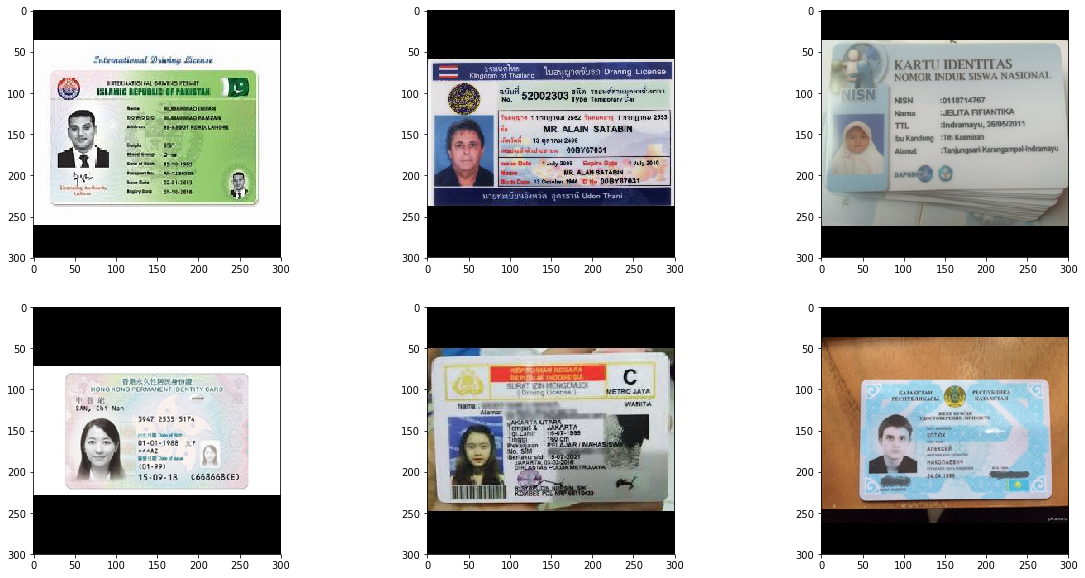

In [40]:
path_det=d+"/"+os.listdir(d)[1]
print(path_det)
fig = plt.figure(figsize=(20,10))
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    img = plt.imread(path_det+"/"+os.listdir(path_det)[i])
    plt.imshow(img)

#### inside = on présume qu'une pièce d'identité valide est présente dans l'image

../data/idcard3/dataset/valid/inside


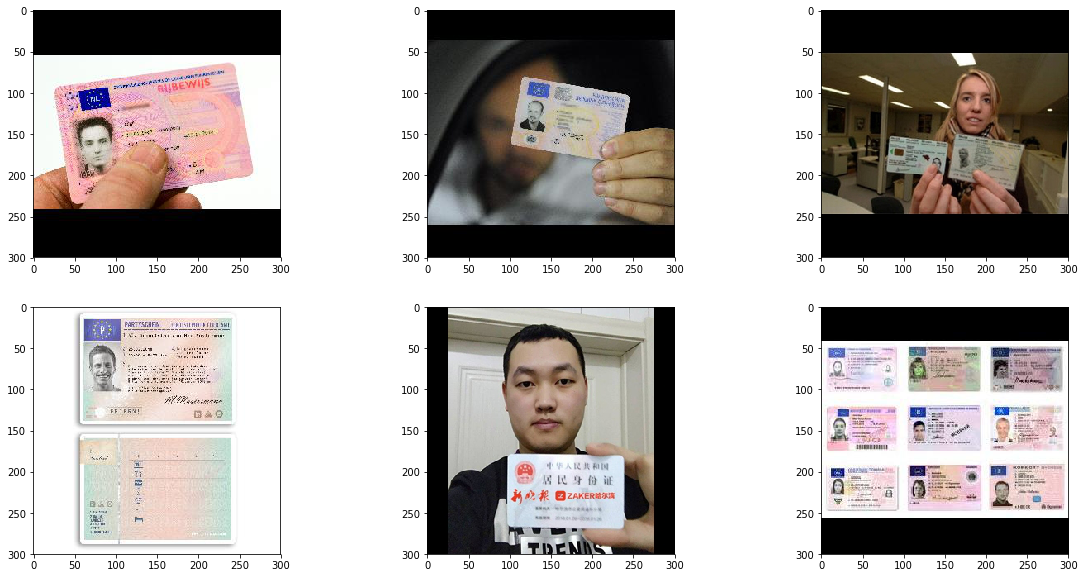

In [41]:
path_det=d+"/"+os.listdir(d)[2]
print(path_det)
fig = plt.figure(figsize=(20,10))
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    img = plt.imread(path_det+"/"+os.listdir(path_det)[i])
    plt.imshow(img)